<a href="https://colab.research.google.com/github/GeorgeWangnottaken/Automated-Essay-Scoring-master/blob/master/cleaning_image_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![image](https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png)](https://www.visual-layer.com)

# Clean Image Folder

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb)
[![Open in Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb)

This notebook shows how you can use fastdup analyze an image folder from potential issues and export a list of problematic files for further action.

By the end of this notebook you will learn how to:

+ Find various dataset issues with fastdup.
+ Export a list of problematic images for further action.

## Installation

If you're new, we encourage you to run the notebook in [Google Colab](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb) or [Kaggle](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/cleaning-image-dataset.ipynb) for the best experience. If you'd like to just view and skim through the notebook, we recommend viewing using [nbviewer](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb).  

Let's start with the installation:

In [ ]:
!pip install fastdup -Uq

Now, test the installation by printing out the version. If there's no error message, we are ready to go!

In [ ]:
import fastdup
fastdup.__version__

'2.5'

In [ ]:
!pip install opendatasets


## Download Dataset

In this notebook let's use a widely available and relatively well curated [Food-101](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/) dataset.

The Food-101 dataset consists of 101 food classes with 1,000 images per class. That is a total of 101,000 images.

Let's download only from the dataset and extract them into our local directory:

https://www.kaggle.com/discussions/general/74235

kaggle datasets download -d shrutisaxena/yoga-pose-image-classification-dataset

https://www.geeksforgeeks.org/how-to-import-kaggle-datasets-directly-into-google-colab/
Used this to download od

In [ ]:

import opendatasets as od
# import pandas

od.download(
    "https://www.kaggle.com/datasets/104f27a86c8947aae221e3e2453e7b64ea67d4dfd65656f7a1c508fca51f5f01")


Skipping, found downloaded files in "./yoga-pose-image-classification-dataset" (use force=True to force download)


## Run fastdup

Once the extraction completes, we can run fastdup on the images.

For that let's create a `fastdup` object and specify the input directory which points to the folder of images.

In [ ]:
fd = fastdup.create(input_dir="yoga-pose-image-classification-dataset")
#input directiory is where data comes from

#output dir=work_dir is where output goes


fastdup By Visual Layer, Inc. 2024. All rights reserved.

A fastdup dataset object was created!

Input directory is set to "yoga-pose-image-classification-dataset"
Work directory is set to "work_dir"

The next steps are:
   1. Analyze your dataset with the .run() function of the dataset object
   2. Interactively explore your data on your local machine with the .explore() function of the dataset object

For more information, use help(fastdup) or check our documentation https://docs.visual-layer.com/docs/getting-started-with-fastdup.



> **NOTE**: If you're running this example on Google Colab, we recommend running with `num_images=40000` in the following cell. This limits fastdup to run on 40000 images instead of the entire dataset which takes shorter time to complete on Google Colab.

In [ ]:
# fd.run(num_images=40000, ccthreshold=0.9)   # runs fastdup on a subset of 40000 images from the dataset
fd.run(ccthreshold=0.9)                       # runs fastdup on the entire dataset

Fastdup was already applied, use overwrite=True to re-run


> **Note**: `ccthreshold` is a parameter to in the connected components algorithm. Read more [here](https://visual-layer.readme.io/docs/dataset-cleanup#threshold-for-similarity-clusters) on how to set an appropriate value for your dataset.

Get a summary of the run showing potentially problematic files.

In [ ]:
fd.summary()
#5991 images


 ########################################################################################

Dataset Analysis Summary: 

    Dataset contains 5991 images
    Valid images are 100.00% (5,991) of the data, invalid are 0.00% (0) of the data
    Outliers: 6.61% (396) of images are possible outliers, and fall in the bottom 5.00% of similarity values.
    For a detailed list of outliers, use `.outliers()`.



['Dataset contains 5991 images',
 'Valid images are 100.00% (5,991) of the data, invalid are 0.00% (0) of the data',
 'Outliers: 6.61% (396) of images are possible outliers, and fall in the bottom 5.00% of similarity values.',
 'For a detailed list of outliers, use `.outliers()`.\n']

## Duplicate Image Pairs

Show a gallery of duplicate image pairs. Distance of `1.0` indicate that the image pairs are exact copies.


**Note that some duplicate images are classified as 2 different poses ewwwwwwwwwwwwwwwwwwwwwww**

In [ ]:
# fd.connected_components()


Generating gallery:   0%|          | 0/5 [00:00<?, ?it/s]

Stored similarity visual view in  work_dir/galleries/duplicates.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



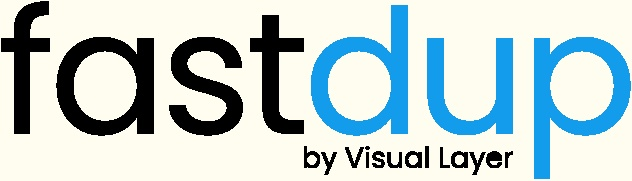
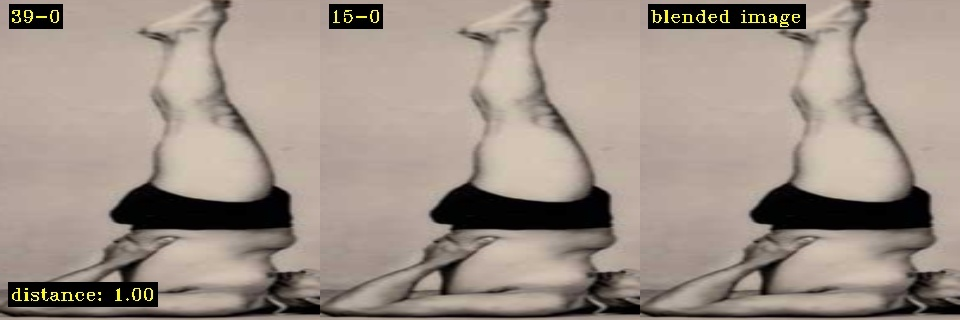
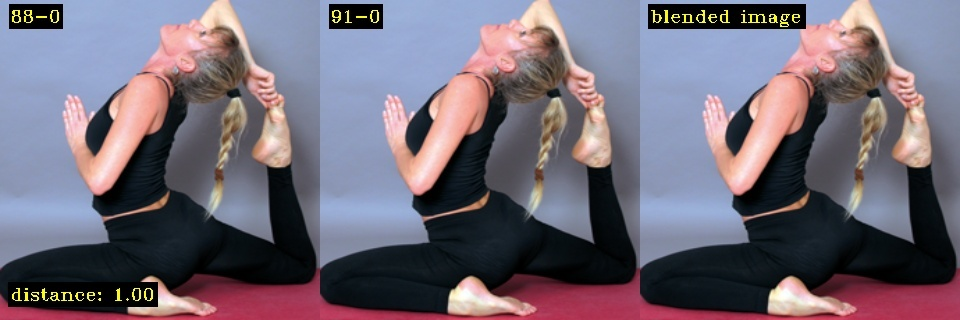
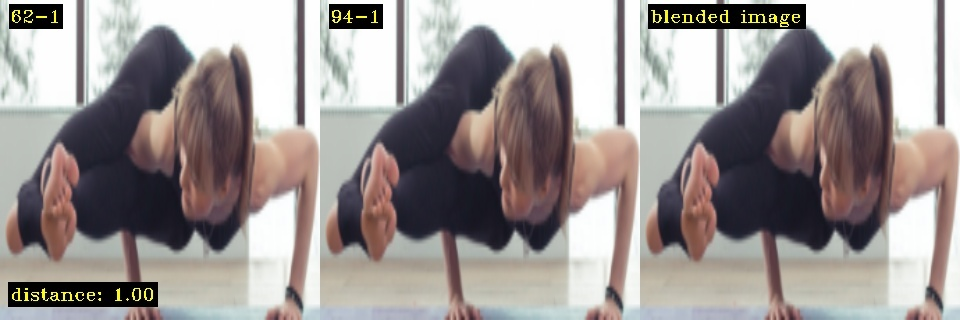
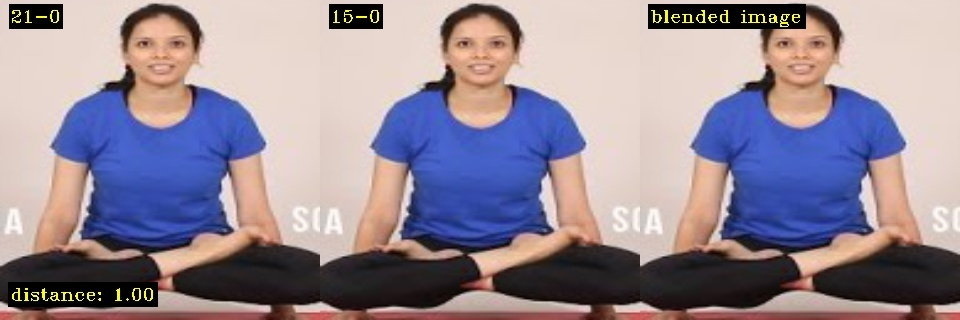
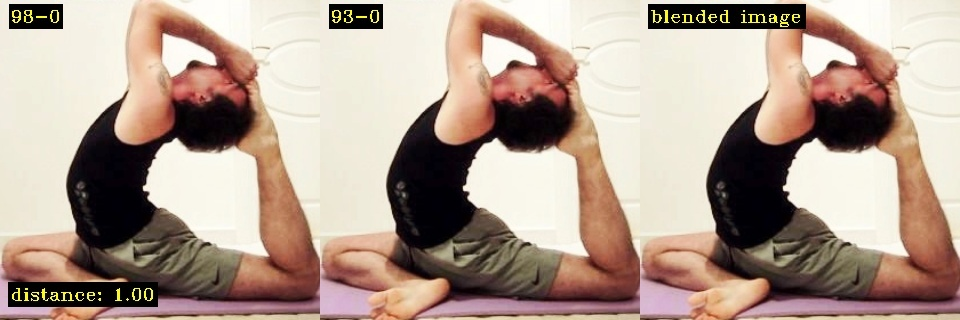

0

In [ ]:
fd.vis.duplicates_gallery(num_images=5)



## List of Duplicates
Now let's single out all duplicates and near-duplicates by running using the connected components function:



In [ ]:
connected_components_df , _ = fd.connected_components()
connected_components_df#.head() #head shows first 5 rows


#there are 1110 near duplicates O_o

#can delete duplicates in the same folder
  #What does count mean????????

index  component_id  count  mean_distance  min_distance  max_distance                                                                                                                 filename error_code  is_valid  fd_index
0         0             0      4       0.977459      0.977459      0.977459  yoga-pose-image-classification-dataset/dataset/adho mukha svanasana/10. screen-shot-2017-09-15-at-17.00.06-1024x585.png      VALID      True         0
1         5             5      4       1.000000      1.000000      1.000000                  yoga-pose-image-classification-dataset/dataset/adho mukha svanasana/13. downward-facing-dog-800x490.png      VALID      True         5
2        20             0      4       0.977459      0.977459      0.977459   yoga-pose-image-classification-dataset/dataset/adho mukha svanasana/2. screen-shot-2017-09-15-at-17.00.06-1024x585.png      VALID      True        20
3        26             5      4       1.000000      1.000000      1.000000                  yoga-pose-image-classification-dataset/dataset/adho mukha svanasana/36. downward-facing-dog-800x490.png      VALID      True        26
4        35            33      4       0.915661      0.915661      0.915661                  yoga-pose-image-classification-dataset/dataset/adho mukha svanasana/47. downward-facing-dog-520x400.png      VALID      True        35
...     ...           ...    ...            ...           ...           ...                                                                                                                      ...        ...       ...       ...
1105   5907          5298      4       0.937687      0.937687      0.937687                                                    yoga-pose-image-classification-dataset/dataset/vrischikasana/25-0.png      VALID      True      5907
1106   5908          5298      4       0.937687      0.937687      0.937687                                                    yoga-pose-image-classification-dataset/dataset/vrischikasana/25-3.png      VALID      True      5908
1107   5938          1765      4       1.000000      1.000000      1.000000                                                    yoga-pose-image-classification-dataset/dataset/vrischikasana/80-0.png      VALID      True      5938
1108   5978          5367      4       0.983585      0.983585      0.983585                                                    yoga-pose-image-classification-dataset/dataset/yoganidrasana/49-0.png      VALID      True      5978
1109   5981          5367      4       0.983585      0.983585      0.983585                                                    yoga-pose-image-classification-dataset/dataset/yoganidrasana/58-0.png      VALID      True      5981

[1110 rows x 10 columns]

Let's now group shit to get the clusters:

In [ ]:
duplicates_df = (
    connected_components_df
    .groupby('component_id')#each component_id is group of similars/duplicates
    .agg(
        filenames=('filename', list),
        count=('filename', 'size'),
        mean_distance=('mean_distance', 'mean')
    )
    .sort_values('mean_distance', ascending=False)
)

In [ ]:
duplicates_df

filenames  count  mean_distance
component_id                                                                                                                                                                                                 
569                                      [yoga-pose-image-classification-dataset/dataset/ardha uttanasana/82-0.png, yoga-pose-image-classification-dataset/dataset/uttanasana/89-0.png]      2       1.000000
722                  [yoga-pose-image-classification-dataset/dataset/baddha konasana/72. dsc_6815.png, yoga-pose-image-classification-dataset/dataset/baddha konasana/79. dsc_6815.png]      2       1.000000
1605          [yoga-pose-image-classification-dataset/dataset/eka pada koundinyanasana i/73-0.png, yoga-pose-image-classification-dataset/dataset/eka pada koundinyanasana ii/95-0.png]      2       1.000000
1606          [yoga-pose-image-classification-dataset/dataset/eka pada koundinyanasana i/74-4.png, yoga-pose-image-classification-dataset/dataset/eka pada koundinyanasana ii/93-4.png]      2       1.000000
1608          [yoga-pose-image-classification-dataset/dataset/eka pada koundinyanasana i/78-0.png, yoga-pose-image-classification-dataset/dataset/eka pada koundinyanasana ii/94-0.png]      2       1.000000
...                                                                                                                                                                                 ...    ...            ...
4734                  [yoga-pose-image-classification-dataset/dataset/utthita hasta padangustasana/77-0.png, yoga-pose-image-classification-dataset/dataset/virabhadrasana ii/53-0.png]      2       0.900411
1695           [yoga-pose-image-classification-dataset/dataset/eka pada rajakapotasana ii/12-0.png, yoga-pose-image-classification-dataset/dataset/eka pada rajakapotasana ii/37-0.png]      2       0.900402
1983                                               [yoga-pose-image-classification-dataset/dataset/halasana/77-0.png, yoga-pose-image-classification-dataset/dataset/halasana/98-0.png]      2       0.900331
522                                [yoga-pose-image-classification-dataset/dataset/ardha uttanasana/19-0.png, yoga-pose-image-classification-dataset/dataset/ardha uttanasana/26-0.png]      2       0.900296
2036                               [yoga-pose-image-classification-dataset/dataset/janu sirsasana/34-0.png, yoga-pose-image-classification-dataset/dataset/paschimottanasana/139-0.png]      2       0.900139

[498 rows x 3 columns]

Need to work with dataframe to cut all rows with mean_distance too low!!!
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
- drop rows
https://visual-layer.readme.io/docs/cleaning-image-dataset#duplicates
- just use neat condition to easily filter wanted

In [ ]:
import pandas as pd

dupe_df2=duplicates_df[duplicates_df["mean_distance"]>0.94]
# duplicates_df.drop([])
# duplicates_df.drop_duplicates()
# connected_components_df.drop_duplicates(), cnat drop duplicates since they arent duplicates
dupe_df2
#Baddha konasana 72 and 79 are duplicates


filenames  count  mean_distance
component_id                                                                                                                                                                                                                                                                                                
569                                                                                                                                     [yoga-pose-image-classification-dataset/dataset/ardha uttanasana/82-0.png, yoga-pose-image-classification-dataset/dataset/uttanasana/89-0.png]      2       1.000000
722                                                                                                                 [yoga-pose-image-classification-dataset/dataset/baddha konasana/72. dsc_6815.png, yoga-pose-image-classification-dataset/dataset/baddha konasana/79. dsc_6815.png]      2       1.000000
1605                                                                                                         [yoga-pose-image-classification-dataset/dataset/eka pada koundinyanasana i/73-0.png, yoga-pose-image-classification-dataset/dataset/eka pada koundinyanasana ii/95-0.png]      2       1.000000
1606                                                                                                         [yoga-pose-image-classification-dataset/dataset/eka pada koundinyanasana i/74-4.png, yoga-pose-image-classification-dataset/dataset/eka pada koundinyanasana ii/93-4.png]      2       1.000000
1608                                                                                                         [yoga-pose-image-classification-dataset/dataset/eka pada koundinyanasana i/78-0.png, yoga-pose-image-classification-dataset/dataset/eka pada koundinyanasana ii/94-0.png]      2       1.000000
...                                                                                                                                                                                                                                                                                ...    ...            ...
635                                                                                                                                     [yoga-pose-image-classification-dataset/dataset/astavakrasana/44-1.png, yoga-pose-image-classification-dataset/dataset/astavakrasana/49-0.png]      2       0.941666
785           [yoga-pose-image-classification-dataset/dataset/bakasana/70-0.png, yoga-pose-image-classification-dataset/dataset/bakasana/70-1.png, yoga-pose-image-classification-dataset/dataset/bakasana/70-2.png, yoga-pose-image-classification-dataset/dataset/bakasana/71-0.png]      4       0.941536
2335                                                                                                                                              [yoga-pose-image-classification-dataset/dataset/malasana/24-0.png, yoga-pose-image-classification-dataset/dataset/malasana/46-0.png]      2       0.941317
4983                                                                                                                                [yoga-pose-image-classification-dataset/dataset/viparita karani/28-0.png, yoga-pose-image-classification-dataset/dataset/viparita karani/28-2.png]      2       0.940689
628                                                                                                                                     [yoga-pose-image-classification-dataset/dataset/astavakrasana/34-0.png, yoga-pose-image-classification-dataset/dataset/astavakrasana/85-0.png]      2       0.940447

[279 rows x 3 columns]

https://github.com/visual-layer/fastdup/blob/main/examples/finding-removing-duplicates.ipynb

In [ ]:
def extract_image_duplicates(row):
    filenames = row['filenames']
    image = filenames[0]
    duplicates = filenames[1:] if len(filenames) > 1 else []
    return pd.Series({'image': image, 'duplicates': duplicates})

unique_df = dupe_df2.apply(extract_image_duplicates, axis=1)
unique_df

image                                                                                                                                                                                              duplicates
component_id                                                                                                                                                                                                                                                                                            
569                     yoga-pose-image-classification-dataset/dataset/ardha uttanasana/82-0.png                                                                                                                                    [yoga-pose-image-classification-dataset/dataset/uttanasana/89-0.png]
722              yoga-pose-image-classification-dataset/dataset/baddha konasana/72. dsc_6815.png                                                                                                                       [yoga-pose-image-classification-dataset/dataset/baddha konasana/79. dsc_6815.png]
1605          yoga-pose-image-classification-dataset/dataset/eka pada koundinyanasana i/73-0.png                                                                                                                   [yoga-pose-image-classification-dataset/dataset/eka pada koundinyanasana ii/95-0.png]
1606          yoga-pose-image-classification-dataset/dataset/eka pada koundinyanasana i/74-4.png                                                                                                                   [yoga-pose-image-classification-dataset/dataset/eka pada koundinyanasana ii/93-4.png]
1608          yoga-pose-image-classification-dataset/dataset/eka pada koundinyanasana i/78-0.png                                                                                                                   [yoga-pose-image-classification-dataset/dataset/eka pada koundinyanasana ii/94-0.png]
...                                                                                          ...                                                                                                                                                                                                     ...
635                        yoga-pose-image-classification-dataset/dataset/astavakrasana/44-1.png                                                                                                                                 [yoga-pose-image-classification-dataset/dataset/astavakrasana/49-0.png]
785                             yoga-pose-image-classification-dataset/dataset/bakasana/70-0.png  [yoga-pose-image-classification-dataset/dataset/bakasana/70-1.png, yoga-pose-image-classification-dataset/dataset/bakasana/70-2.png, yoga-pose-image-classification-dataset/dataset/bakasana/71-0.png]
2335                            yoga-pose-image-classification-dataset/dataset/malasana/24-0.png                                                                                                                                      [yoga-pose-image-classification-dataset/dataset/malasana/46-0.png]
4983                     yoga-pose-image-classification-dataset/dataset/viparita karani/28-0.png                                                                                                                               [yoga-pose-image-classification-dataset/dataset/viparita karani/28-2.png]
628                        yoga-pose-image-classification-dataset/dataset/astavakrasana/34-0.png                                                                                                                                 [yoga-pose-image-classification-dataset/dataset/astavakrasana/85-0.png]

[279 rows x 2 columns]

In [ ]:
duplicates_to_remove = unique_df['duplicates'].tolist() #got list of removables


Visualize duplicates removed:
- want to remove all those that are "too duplicate" without removing original data
- I classify 0.98, 0.97 as duplicate
- At 0.93, they're also kinda duplicates
- At 0.9, most of the "duplicates" are different poses or at least different images, too low threshold


Generating gallery:   0%|          | 0/20 [00:00<?, ?it/s]

Stored similarity visual view in  duplicate90/duplicates.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



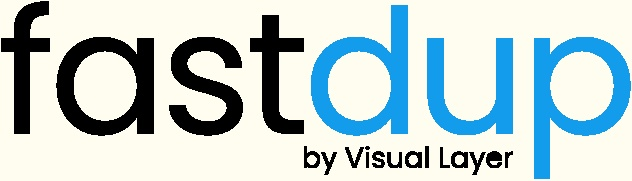
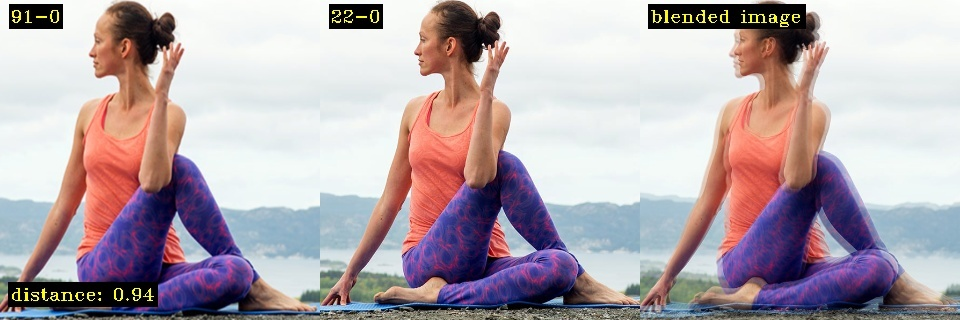
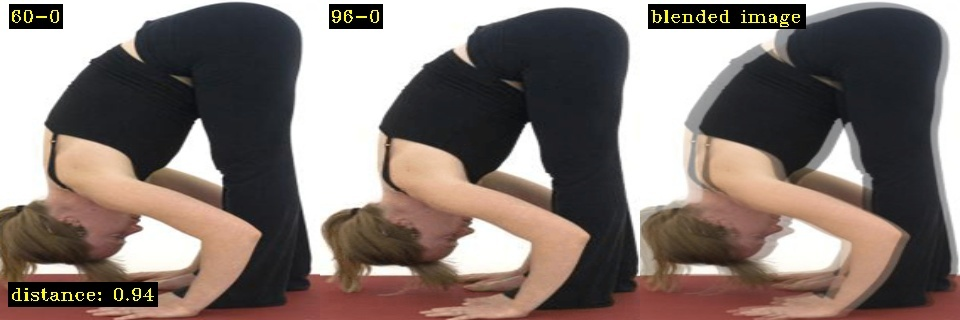
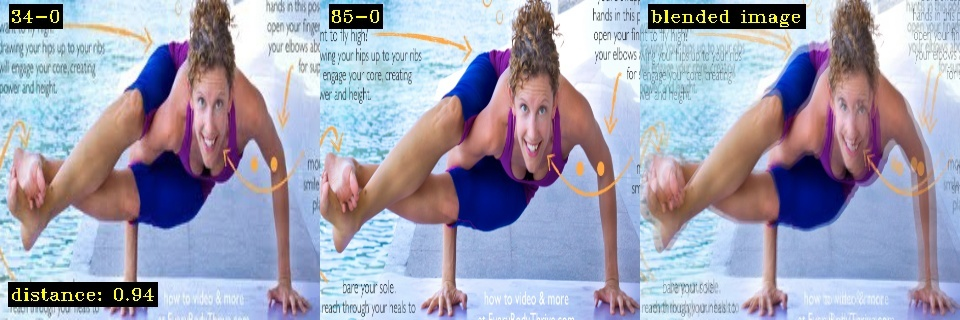
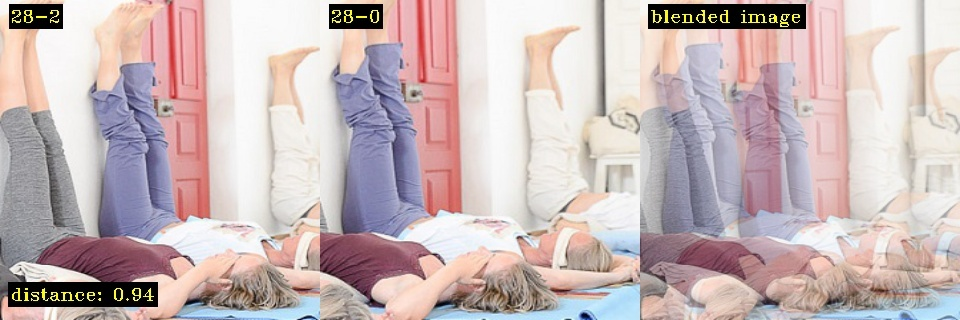
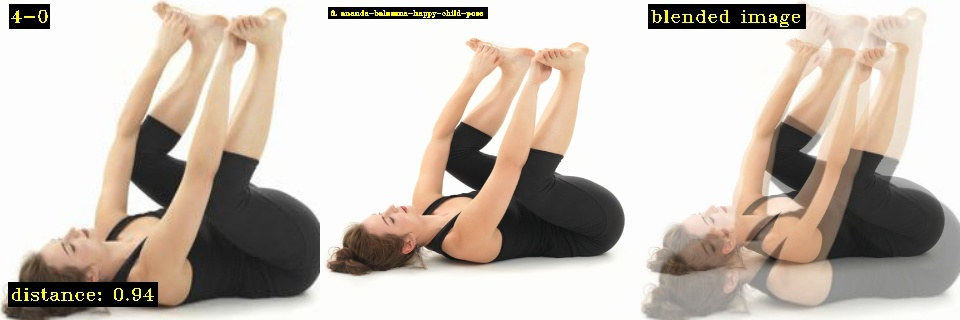
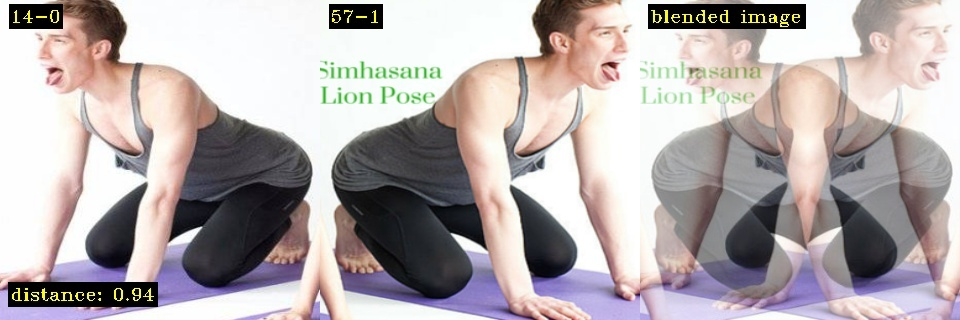
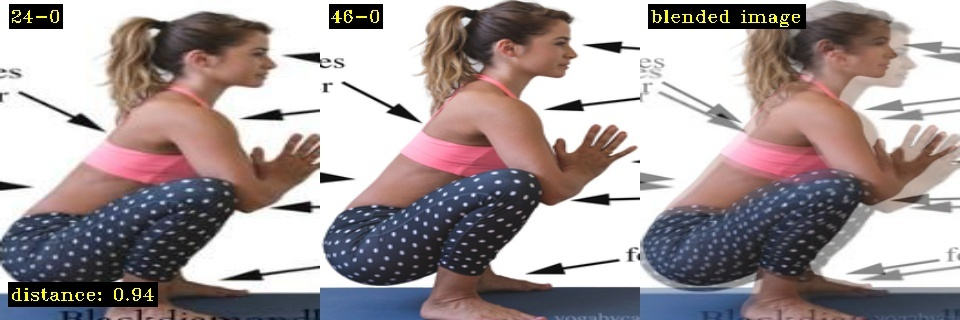
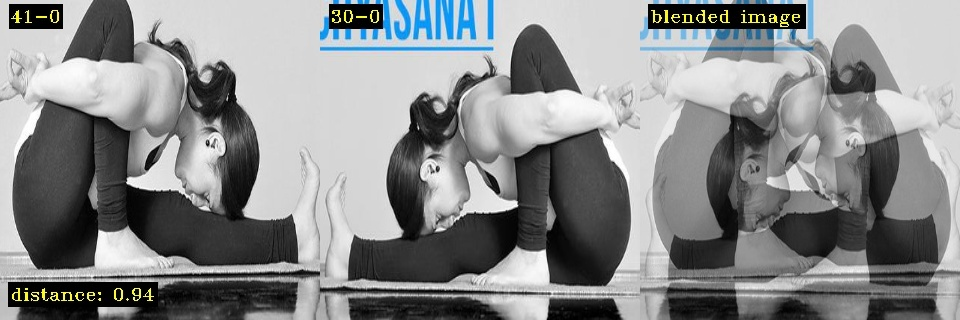
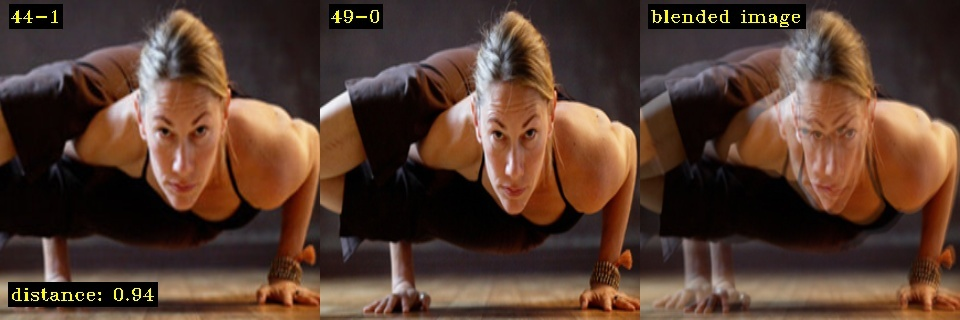
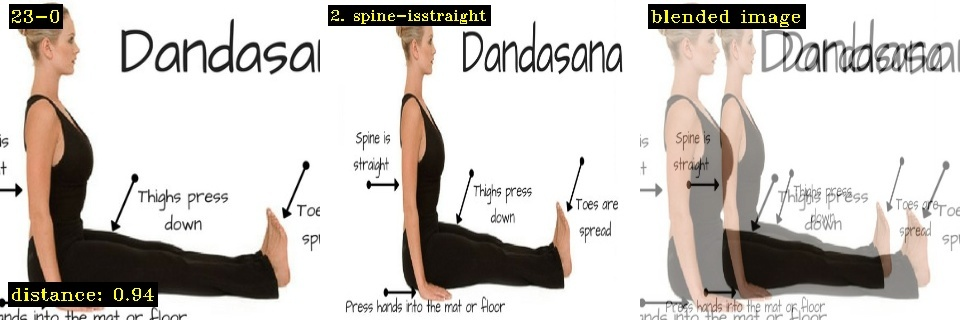

0

In [ ]:
#can check ends
fd.vis.duplicates_gallery(ascending="True",threshold=0.94,save_path="duplicate90")


#Alternative duplicate finding
https://medium.com/visual-layer/fastdup-a-powerful-tool-to-manage-clean-curate-visual-data-at-scale-on-your-cpu-for-free-12e850946ead


In [ ]:
top_components = fastdup.find_top_components(work_dir="work_dir",max_items=4,threshold=0.94)
  #i don't know
#Used tooltip to finetune
  #now want to save list of duplicates
# top_components.

deleted_dupes=fastdup.delete_components(top_components, dry_run=True)
print(len(deleted_dupes),"is amount of deleted duplicates")

#super quickly cuts 110 images yay!!!

rm -f yoga-pose-image-classification-dataset/dataset/chakravakasana/16-0.png
rm -f yoga-pose-image-classification-dataset/dataset/marjaryasana/3-0.png
rm -f yoga-pose-image-classification-dataset/dataset/marjaryasana/93-0.png
rm -f yoga-pose-image-classification-dataset/dataset/utthita trikonasana/0-0.png
rm -f yoga-pose-image-classification-dataset/dataset/utthita trikonasana/45-0.png
rm -f yoga-pose-image-classification-dataset/dataset/utthita trikonasana/93-0.png
rm -f yoga-pose-image-classification-dataset/dataset/ananda balasana/67-0.png
rm -f yoga-pose-image-classification-dataset/dataset/balasana/8. ananda-balasana-happy-child-pose.png
rm -f yoga-pose-image-classification-dataset/dataset/baddha konasana/5. 4_20reclinding_20bound.png
rm -f yoga-pose-image-classification-dataset/dataset/supta baddha konasana/85-0.png
rm -f yoga-pose-image-classification-dataset/dataset/ashtanga namaskara/30-0.png
rm -f yoga-pose-image-classification-dataset/dataset/ashtanga namaskara/58-0.png
rm -

In [ ]:
# fd.img_stats()
# fd.explore()

## Outliers

Visualize a gallery of outliers. Lower `Distance` value indicates higher chances of outliers.

Generating gallery:   0%|          | 0/5 [00:00<?, ?it/s]

Stored outliers visual view in  work_dir/galleries/outliers.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



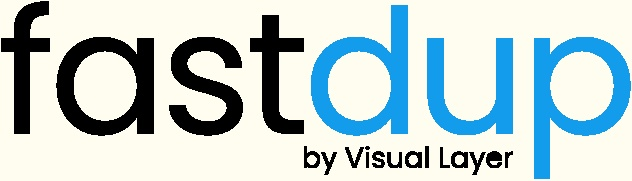
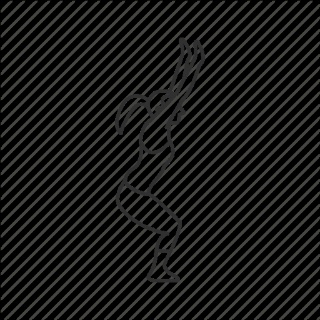
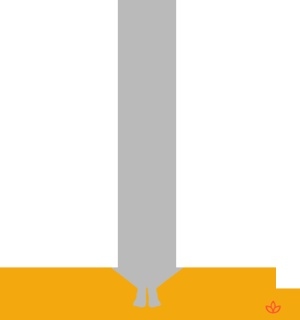
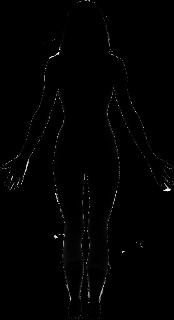
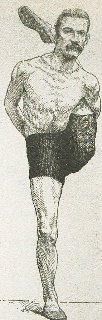

0

In [ ]:
fd.vis.outliers_gallery(num_images=5)

# List of Outliers
Let's first get the outliers `DataFrame`:

In [ ]:
outlier_df = fd.outliers()
outlier_df.head()

outlier  nearest  distance                                                                                 filename_outlier  index_x error_code_outlier  is_valid_outlier  fd_index_outlier                                                                                                   filename_nearest  index_y error_code_nearest  is_valid_nearest  fd_index_nearest
0     3794     2566  0.437657                     yoga-pose-image-classification-dataset/dataset/salamba bhujangasana/30-1.png     3794              VALID              True              3794                                                 yoga-pose-image-classification-dataset/dataset/makarasana/67-0.png     2566              VALID              True              2566
1     5032      879  0.548660                    yoga-pose-image-classification-dataset/dataset/utkatasana/27. paul-57-512.png     5032              VALID              True              5032            yoga-pose-image-classification-dataset/dataset/balasana/12. yoga-child-pose-meditation-balasana-512.png      879              VALID              True               879
2     4440        9  0.548978  yoga-pose-image-classification-dataset/dataset/tadasana/3. tadasana-urdhva-baddha-hastasana.png     4440              VALID              True              4440  yoga-pose-image-classification-dataset/dataset/adho mukha svanasana/16. one-leg-downward-facing-dog-yoga-pose.png        9              VALID              True                 9
3     4446     5036  0.605771   yoga-pose-image-classification-dataset/dataset/tadasana/47. mountain-pose-women-silhouette.png     4446              VALID              True              4446                  yoga-pose-image-classification-dataset/dataset/utkatasana/2. d691b767d75133d3e177618dd04dfeaa.png     5036              VALID              True              5036
4     4613     4557  0.633355                                 yoga-pose-image-classification-dataset/dataset/tulasana/45-0.png     4613              VALID              True              4613                                                   yoga-pose-image-classification-dataset/dataset/tolasana/36-0.png     4557              VALID              True              4557

Let's treat all images with `distance<0.68` as outliers.

In [ ]:
list_of_outliers = outlier_df[outlier_df.distance < 0.68].filename_outlier.tolist()
list_of_outliers

['yoga-pose-image-classification-dataset/dataset/salamba bhujangasana/30-1.png',
 'yoga-pose-image-classification-dataset/dataset/utkatasana/27. paul-57-512.png',
 'yoga-pose-image-classification-dataset/dataset/tadasana/3. tadasana-urdhva-baddha-hastasana.png',
 'yoga-pose-image-classification-dataset/dataset/tadasana/47. mountain-pose-women-silhouette.png',
 'yoga-pose-image-classification-dataset/dataset/tulasana/45-0.png',
 'yoga-pose-image-classification-dataset/dataset/durvasasana/93-0.png',
 'yoga-pose-image-classification-dataset/dataset/salamba sarvangasana/73-0.png',
 'yoga-pose-image-classification-dataset/dataset/utkatasana/17. 61160a4e0d5bb5c5fdab7610bc9b8269.png',
 'yoga-pose-image-classification-dataset/dataset/utkatasana/6. 61160a4e0d5bb5c5fdab7610bc9b8269.png',
 'yoga-pose-image-classification-dataset/dataset/supta padangusthasana/67-0.png',
 'yoga-pose-image-classification-dataset/dataset/baddha konasana/21. man-practicing-yoga-in-bound-angle-pose_1470453.png',
 'yoga

## Dark, Bright and Blurry Images

Visualize image with statistical metrics.

Visualize dark images from the dataset in ascending order.

Generating gallery:   0%|          | 0/5 [00:00<?, ?it/s]

Stored mean visual view in  work_dir/galleries/mean.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



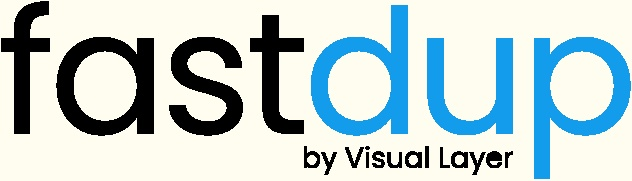
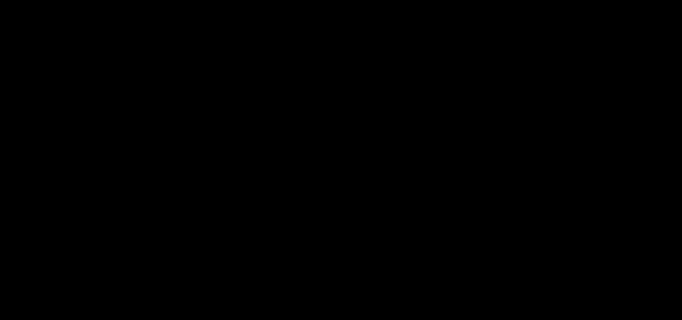
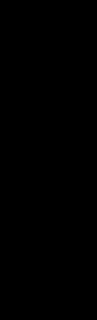
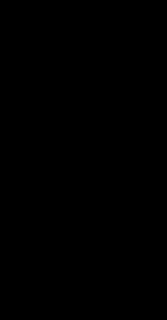
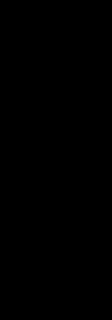
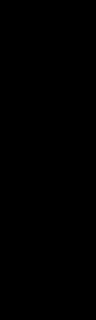

0

In [ ]:
fd.vis.stats_gallery(metric='dark', num_images=5)

# List of Dark Images
Get a `DataFrame` of image statistics.

In [ ]:
stats_df = fd.img_stats()

If an image has a mean<13 then we conclude it's a dark image:

In [ ]:
dark_images = stats_df[stats_df['mean'] < 13]
dark_images

index  img_w  img_h  unique       blur     mean  min    max     stdv  file_size  contrast                                                                                                                               filename error_code  is_valid  fd_index
931     931    497    233       1     0.0000   0.0000  0.0  255.0   0.0000      13812       1.0  yoga-pose-image-classification-dataset/dataset/balasana/47. 882af92d43b82dd25d4fdfd5e300d79b-child-yoga-pose-silhouette-by-vexels.png      VALID      True       931
4419   4419    800    800      84   390.6897   0.6348  0.0  255.0   7.8454      33100       1.0                                                            yoga-pose-image-classification-dataset/dataset/tadasana/11. tadasana800.png      VALID      True      4419
4431   4431    300    995       1     0.0000   0.0000  0.0  255.0   0.0000      37249       1.0                                                         yoga-pose-image-classification-dataset/dataset/tadasana/32. 300px-tadasana.png      VALID      True      4431
4446   4446    431    789     137  3029.7073   1.8406  0.0  255.0  15.2385      28393       1.0                                         yoga-pose-image-classification-dataset/dataset/tadasana/47. mountain-pose-women-silhouette.png      VALID      True      4446
4450   4450    300    851       1     0.0000   0.0000  0.0  255.0   0.0000      27159       1.0                                       yoga-pose-image-classification-dataset/dataset/tadasana/51. 300px-viparita_namaskar_tadasana.png      VALID      True      4450
5012   5012    208    398       1     0.0000   0.0000  0.0  255.0   0.0000      10052       1.0                                                   yoga-pose-image-classification-dataset/dataset/utkatasana/16. chair-pose-600x450.png      VALID      True      5012
5042   5042    200    657       1     0.0000   0.0000  0.0  255.0   0.0000      16127       1.0                                                     yoga-pose-image-classification-dataset/dataset/utkatasana/35. 200px-utkatasana.png      VALID      True      5042
5067   5067    567    567     254   617.7229  10.8118  0.0  255.0  40.7911      56503       1.0                                        yoga-pose-image-classification-dataset/dataset/utkatasana/7. chair-pose-yoga-blocks-567x567.png      VALID      True      5067

To get a list of the dark images:

In [ ]:
list_of_dark_images = dark_images['filename'].to_list()
list_of_dark_images

['yoga-pose-image-classification-dataset/dataset/balasana/47. 882af92d43b82dd25d4fdfd5e300d79b-child-yoga-pose-silhouette-by-vexels.png',
 'yoga-pose-image-classification-dataset/dataset/tadasana/11. tadasana800.png',
 'yoga-pose-image-classification-dataset/dataset/tadasana/32. 300px-tadasana.png',
 'yoga-pose-image-classification-dataset/dataset/tadasana/47. mountain-pose-women-silhouette.png',
 'yoga-pose-image-classification-dataset/dataset/tadasana/51. 300px-viparita_namaskar_tadasana.png',
 'yoga-pose-image-classification-dataset/dataset/utkatasana/16. chair-pose-600x450.png',
 'yoga-pose-image-classification-dataset/dataset/utkatasana/35. 200px-utkatasana.png',
 'yoga-pose-image-classification-dataset/dataset/utkatasana/7. chair-pose-yoga-blocks-567x567.png']

# List of Blurry Images

Visualize blurry images from the dataset in ascending order.

Generating gallery:   0%|          | 0/5 [00:00<?, ?it/s]

Stored blur visual view in  work_dir/galleries/blur.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



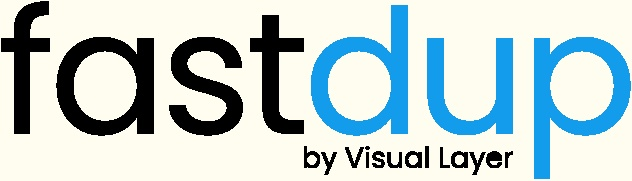
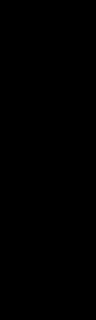
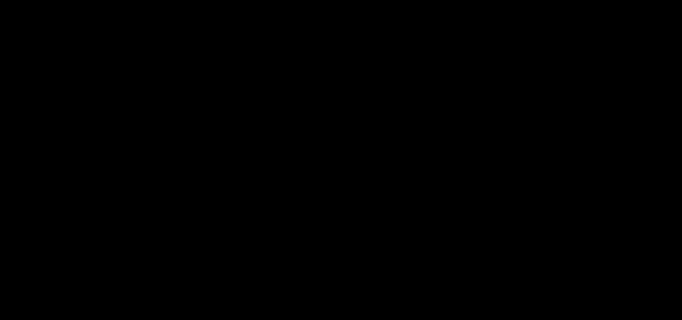
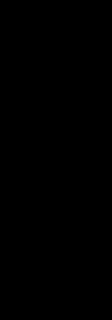
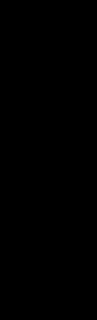
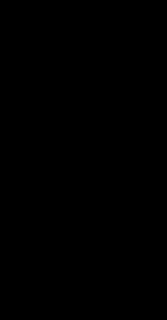

0

In [ ]:
fd.vis.stats_gallery(metric='blur', num_images=5)

In [ ]:
blurry_images = stats_df[stats_df['blur'] < 50]
blurry_images.head()

index  img_w  img_h  unique    blur      mean   min    max     stdv  file_size  contrast                                                                                                                               filename error_code  is_valid  fd_index
931     931    497    233       1   0.000    0.0000   0.0  255.0   0.0000      13812    1.0000  yoga-pose-image-classification-dataset/dataset/balasana/47. 882af92d43b82dd25d4fdfd5e300d79b-child-yoga-pose-silhouette-by-vexels.png      VALID      True       931
1161   1161    305    361     197  40.751   75.6807  20.0  218.0  47.5824     125489    0.8319                                                                 yoga-pose-image-classification-dataset/dataset/bhujapidasana/106-0.png      VALID      True      1161
1917   1917    199    235     248  12.282  101.2567   0.0  247.0  50.3371      54200    1.0000                                                     yoga-pose-image-classification-dataset/dataset/eka pada rajakapotasana ii/80-0.png      VALID      True      1917
4431   4431    300    995       1   0.000    0.0000   0.0  255.0   0.0000      37249    1.0000                                                         yoga-pose-image-classification-dataset/dataset/tadasana/32. 300px-tadasana.png      VALID      True      4431
4450   4450    300    851       1   0.000    0.0000   0.0  255.0   0.0000      27159    1.0000                                       yoga-pose-image-classification-dataset/dataset/tadasana/51. 300px-viparita_namaskar_tadasana.png      VALID      True      4450

Get list of blurry images

In [ ]:
list_of_blurry_images = blurry_images['filename'].to_list()
list_of_blurry_images

['yoga-pose-image-classification-dataset/dataset/balasana/47. 882af92d43b82dd25d4fdfd5e300d79b-child-yoga-pose-silhouette-by-vexels.png',
 'yoga-pose-image-classification-dataset/dataset/bhujapidasana/106-0.png',
 'yoga-pose-image-classification-dataset/dataset/eka pada rajakapotasana ii/80-0.png',
 'yoga-pose-image-classification-dataset/dataset/tadasana/32. 300px-tadasana.png',
 'yoga-pose-image-classification-dataset/dataset/tadasana/51. 300px-viparita_namaskar_tadasana.png',
 'yoga-pose-image-classification-dataset/dataset/utkatasana/16. chair-pose-600x450.png',
 'yoga-pose-image-classification-dataset/dataset/utkatasana/35. 200px-utkatasana.png']

## Summary

Lets print out a summary of the list of files we got from above.

In [ ]:
# print(f"Broken: {len(list_of_broken_images)}")

print(f"Duplicates: {len(deleted_dupes)}")

print(f"Outliers: {len(list_of_outliers)}")
print(f"Dark: {len(list_of_dark_images)}")
# print(f"Bright: {len(list_of_bright_images)}")
print(f"Blurry: {len(list_of_blurry_images)}")

problem_images =  deleted_dupes+list_of_outliers + list_of_dark_images + list_of_blurry_images

print(f"Total unique problem images: {len(set(problem_images))}")
print(problem_images)



Duplicates: 279
Outliers: 19
Dark: 8
Blurry: 7
Total unique problem images: 306
['yoga-pose-image-classification-dataset/dataset/chakravakasana/16-0.png', 'yoga-pose-image-classification-dataset/dataset/marjaryasana/3-0.png', 'yoga-pose-image-classification-dataset/dataset/marjaryasana/93-0.png', 'yoga-pose-image-classification-dataset/dataset/utthita trikonasana/0-0.png', 'yoga-pose-image-classification-dataset/dataset/utthita trikonasana/45-0.png', 'yoga-pose-image-classification-dataset/dataset/utthita trikonasana/93-0.png', 'yoga-pose-image-classification-dataset/dataset/ananda balasana/67-0.png', 'yoga-pose-image-classification-dataset/dataset/balasana/8. ananda-balasana-happy-child-pose.png', 'yoga-pose-image-classification-dataset/dataset/baddha konasana/5. 4_20reclinding_20bound.png', 'yoga-pose-image-classification-dataset/dataset/supta baddha konasana/85-0.png', 'yoga-pose-image-classification-dataset/dataset/ashtanga namaskara/30-0.png', 'yoga-pose-image-classification-datas

# Deleting all the problem images
need to take the file names and remmove the images
- manually if not many
- with for loop stuff
Also nice to visualize these

https://www.geeksforgeeks.org/delete-a-locally-uploaded-file-on-google-colab/
- Use rm in command line

In [ ]:
%rm 'yoga-pose-image-classification-dataset/dataset/chakravakasana/16-0.png'
  #Correctly removes desired image from dataset

i=0
for image_path in problem_images:
  i+=1
  print(image_path)
  %rm (image_path) #remove
  if i==5: break

https://stackoverflow.com/questions/62496307/remove-files-on-google-drive-using-google-colab

https://www.geeksforgeeks.org/delete-a-directory-or-file-using-python/
- must throw error if file not found

https://stackoverflow.com/questions/10840533/most-pythonic-way-to-delete-a-file-which-may-not-exist

In [ ]:
import os


# os.remove('yoga-pose-image-classification-dataset/dataset/ananda balasana/67-0.png')

#also correctly removes image from dataset

for image_path in problem_images:
    if os.path.exists(image_path):
      os.remove(image_path)


In [ ]:
import os


i=0
for image_path in problem_images:
  try:
      os.remove(image_path)
  except OSError:
    i+=1

print(i,"files removed, can't find in directory anymore")

313 files removed, can't find in directory anymore


Check number of remaining files:
https://pynative.com/python-count-number-of-files-in-a-directory/

In [ ]:
import os.path

!pwd
DIR= "/content/yoga-pose-image-classification-dataset/dataset"

count = 0
for root_dir, cur_dir, files in os.walk(DIR):#Walk through all subdirectories for # files
    count += len(files)
print(count,"files left out of original 5991")
print(5991-count,"images removed, which is close enough to 306 unique problem images")
#Maybe 3 couldn't remove



/content
5688 files left out of original 5991
303 images removed


#download clean dataset

legit: https://www.youtube.com/watch?v=Ann21Y0kmVg

https://saturncloud.io/blog/how-to-download-multiple-files-or-an-entire-folder-from-google-colab/

In [ ]:
!zip -r /content/yoga-pose-image-classification-dataset/dataset.zip /content/yoga-pose-image-classification-dataset/dataset/

#zip that folder to same place
#download that!

Streaming output truncated to the last 5000 lines.
  adding: content/yoga-pose-image-classification-dataset/dataset/vasisthasana/26-0.png (deflated 12%)
  adding: content/yoga-pose-image-classification-dataset/dataset/vasisthasana/60-0.png (deflated 3%)
  adding: content/yoga-pose-image-classification-dataset/dataset/vasisthasana/4-0.png (deflated 1%)
  adding: content/yoga-pose-image-classification-dataset/dataset/vasisthasana/42-0.png (deflated 0%)
  adding: content/yoga-pose-image-classification-dataset/dataset/vasisthasana/32-0.png (deflated 5%)
  adding: content/yoga-pose-image-classification-dataset/dataset/vasisthasana/82-0.png (deflated 3%)
  adding: content/yoga-pose-image-classification-dataset/dataset/vasisthasana/62-0.png (deflated 0%)
  adding: content/yoga-pose-image-classification-dataset/dataset/vasisthasana/47-0.png (deflated 18%)
  adding: content/yoga-pose-image-classification-dataset/dataset/vasisthasana/79-0.png (deflated 4%)
  adding: content/yoga-pose-image-class

In [ ]:
from google.colab import files
files.download('/content/yoga-pose-image-classification-dataset/dataset.zip')
#or download from left side, that's ok too

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pwd
%cd /content/yoga-pose-image-classification-dataset/dataset
# !pwd
!zip -r dataset.zip dataset/

# from google.colab import files
# files.download('dataset.zip')

## Wrap Up

That's a wrap! In this notebook we showed how you can run fastdup on a dataset or any folder of images.

We've seen how to use fastdup to find:

+ Find various dataset issues with fastdup.
+ Export a list of problematic images for further action.

For each problem we got a list of file names for further action. Depending on use cases, you might choose to delete the image, relabel them or simply move the image elsewhere.

Next, feel free to check out other tutorials -

+ ⚡ [**Quickstart**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb): Learn how to install fastdup, load a dataset and analyze it for potential issues such as duplicates/near-duplicates, broken images, outliers, dark/bright/blurry images, and view visually similar image clusters. If you're new, start here!
+ 🧹 [**Clean Image Folder**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb): Learn how to analyze and clean a folder of images from potential issues and export a list of problematic files for further action. If you have an unorganized folder of images, this is a good place to start.
+ 🖼 [**Analyze Image Classification Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-image-classification-dataset.ipynb): Learn how to load a labeled image classification dataset and analyze for potential issues. If you have labeled ImageNet-style folder structure, have a go!
+ 🎁 [**Analyze Object Detection Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-object-detection-dataset.ipynb): Learn how to load bounding box annotations for object detection and analyze for potential issues. If you have a COCO-style labeled object detection dataset, give this example a try.


# (Original unused code)

In [ ]:
fd = fastdup.create(input_dir="food-101/images/")

!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
!tar -xf food-101.tar.gz


## Broken Images

The lowest hanging fruit is to find a list of broken images and remove them from your dataset. These images are most probably corrupted file and could not be loaded.

To get the broken images simply run

In [ ]:
broken_images = fd.invalid_instances()
broken_images

Empty DataFrame
Columns: [filename, index, error_code, is_valid, fd_index]
Index: []

This dataset is a carefully curated, so we did not find any broken images. Which is great!

## List of Bright Images: these seem legit

Visualize bright images from the dataset in descending order.

Generating gallery:   0%|          | 0/5 [00:00<?, ?it/s]

Stored mean visual view in  work_dir/galleries/mean.html
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



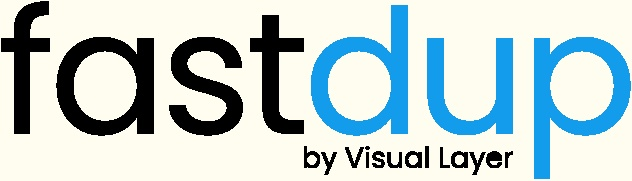
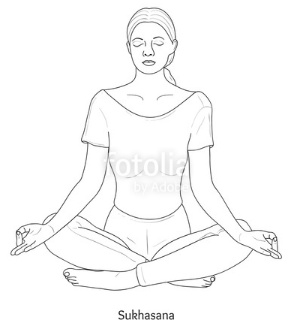
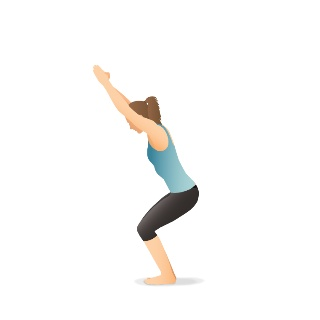
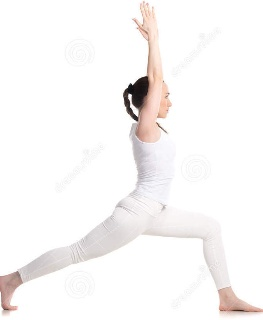
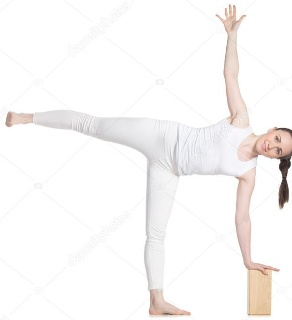
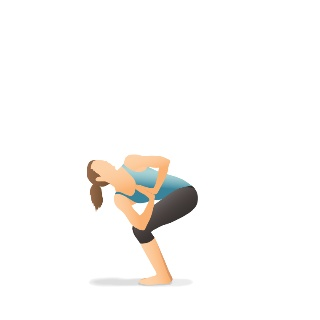

0

In [ ]:
fd.vis.stats_gallery(metric='bright', num_images=5)

Let's set that if `mean>220.5` we will conclude it's a bright image. You can set your own mean threshold depending on your data.

In [ ]:
bright_images = stats_df[stats_df['mean'] > 220.5]
bright_images.head()

index  img_w  img_h  unique       blur      mean   min    max     stdv  file_size  contrast                                    filename error_code  is_valid  fd_index
3651    3651    512    289     171   557.1130  227.8502  85.0  255.0  41.1604      21188       0.5  food-101/images/beef_carpaccio/3169022.jpg      VALID      True      3651
10338  10338    512    512     256  1419.4502  226.0271   0.0  255.0  60.5383      24975       1.0      food-101/images/bruschetta/2275519.jpg      VALID      True     10338
26809  26809    512    384     256  1015.4831  230.4804   0.0  255.0  37.7391      21619       1.0       food-101/images/crab_cakes/445057.jpg      VALID      True     26809
39668  39668    341    512     256  1823.7296  233.1629   0.0  255.0  51.8224      41286       1.0       food-101/images/foie_gras/3267247.jpg      VALID      True     39668
39744  39744    512    384     256   453.5893  222.3561   0.0  255.0  52.7906      19494       1.0         food-101/images/foie_gras/35694.jpg      VALID      True     39744

Get a list of bright images

In [ ]:
list_of_bright_images = bright_images['filename'].to_list()
list_of_bright_images

['food-101/images/beef_carpaccio/3169022.jpg',
 'food-101/images/bruschetta/2275519.jpg',
 'food-101/images/crab_cakes/445057.jpg',
 'food-101/images/foie_gras/3267247.jpg',
 'food-101/images/foie_gras/35694.jpg',
 'food-101/images/foie_gras/583722.jpg',
 'food-101/images/foie_gras/71445.jpg',
 'food-101/images/foie_gras/71461.jpg',
 'food-101/images/hamburger/1585333.jpg',
 'food-101/images/hamburger/3578279.jpg',
 'food-101/images/hamburger/3783650.jpg',
 'food-101/images/ice_cream/3214424.jpg',
 'food-101/images/risotto/71446.jpg']

In [ ]:
# a function to group connected components
def get_clusters(df, sort_by='count', min_count=2, ascending=False):
    # columns to aggregate
    agg_dict = {'filename': list, 'mean_distance': max, 'count': len}

    if 'label' in df.columns:
        agg_dict['label'] = list

    # filter by count
    df = df[df['count'] >= min_count]

    # group and aggregate columns
    grouped_df = df.groupby('component_id').agg(agg_dict)

    # sort
    grouped_df = grouped_df.sort_values(by=[sort_by], ascending=ascending)
    return grouped_df

## Clusters

## Image Clusters

Visualize image clusters from the dataset.

> **Note**: Setting `num_images=5` shows a gallery of with 5 rows. Change this value to view more/less.

Generating gallery:   0%|          | 0/10 [00:00<?, ?it/s]

Finished OK. Components are stored as image files work_dir/galleries/components_[index].jpg
Stored components visual view in  work_dir/galleries/components.html
Execution time in seconds 1.6
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



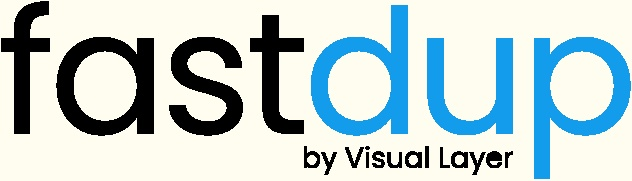
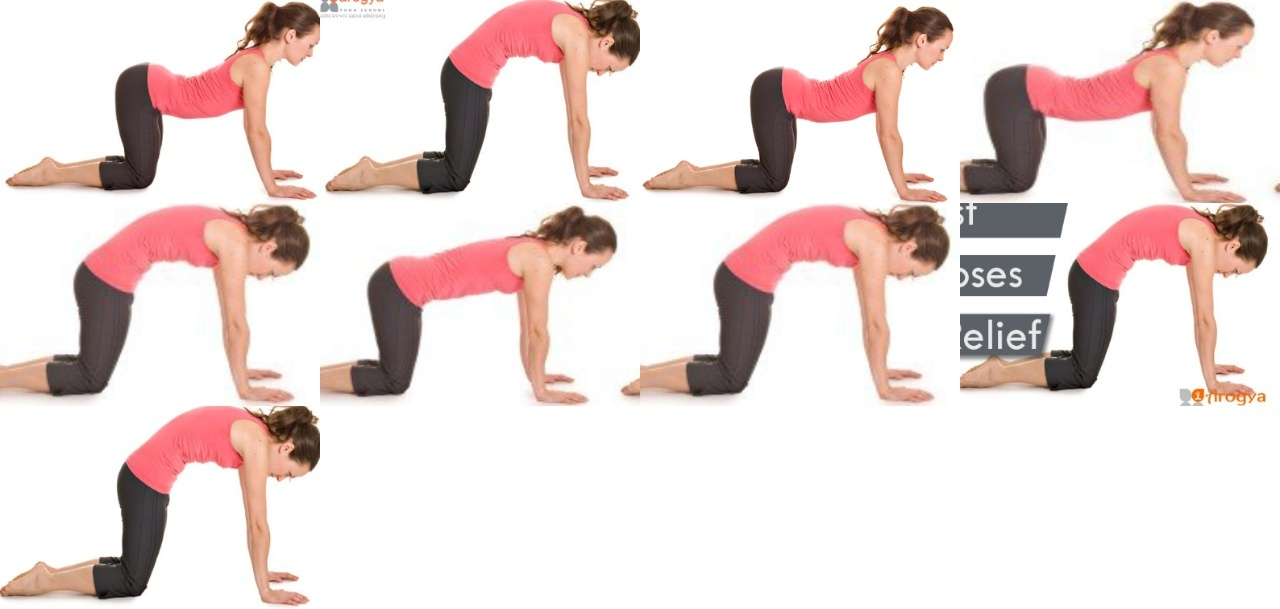
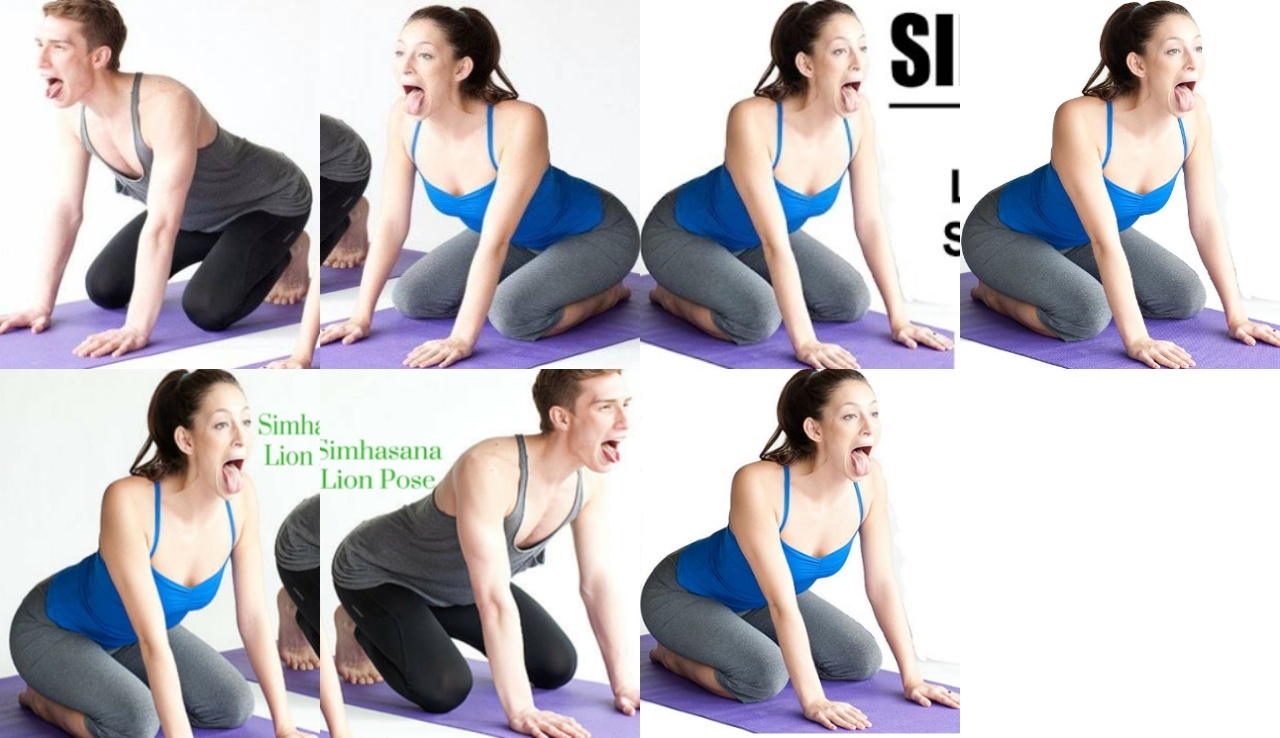
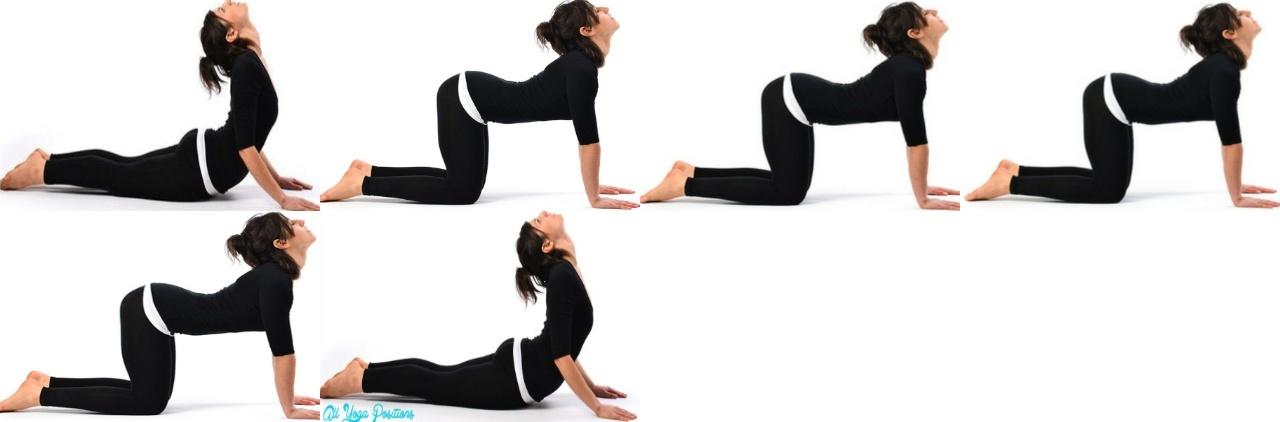
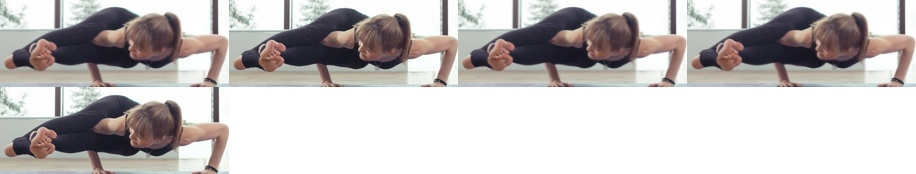
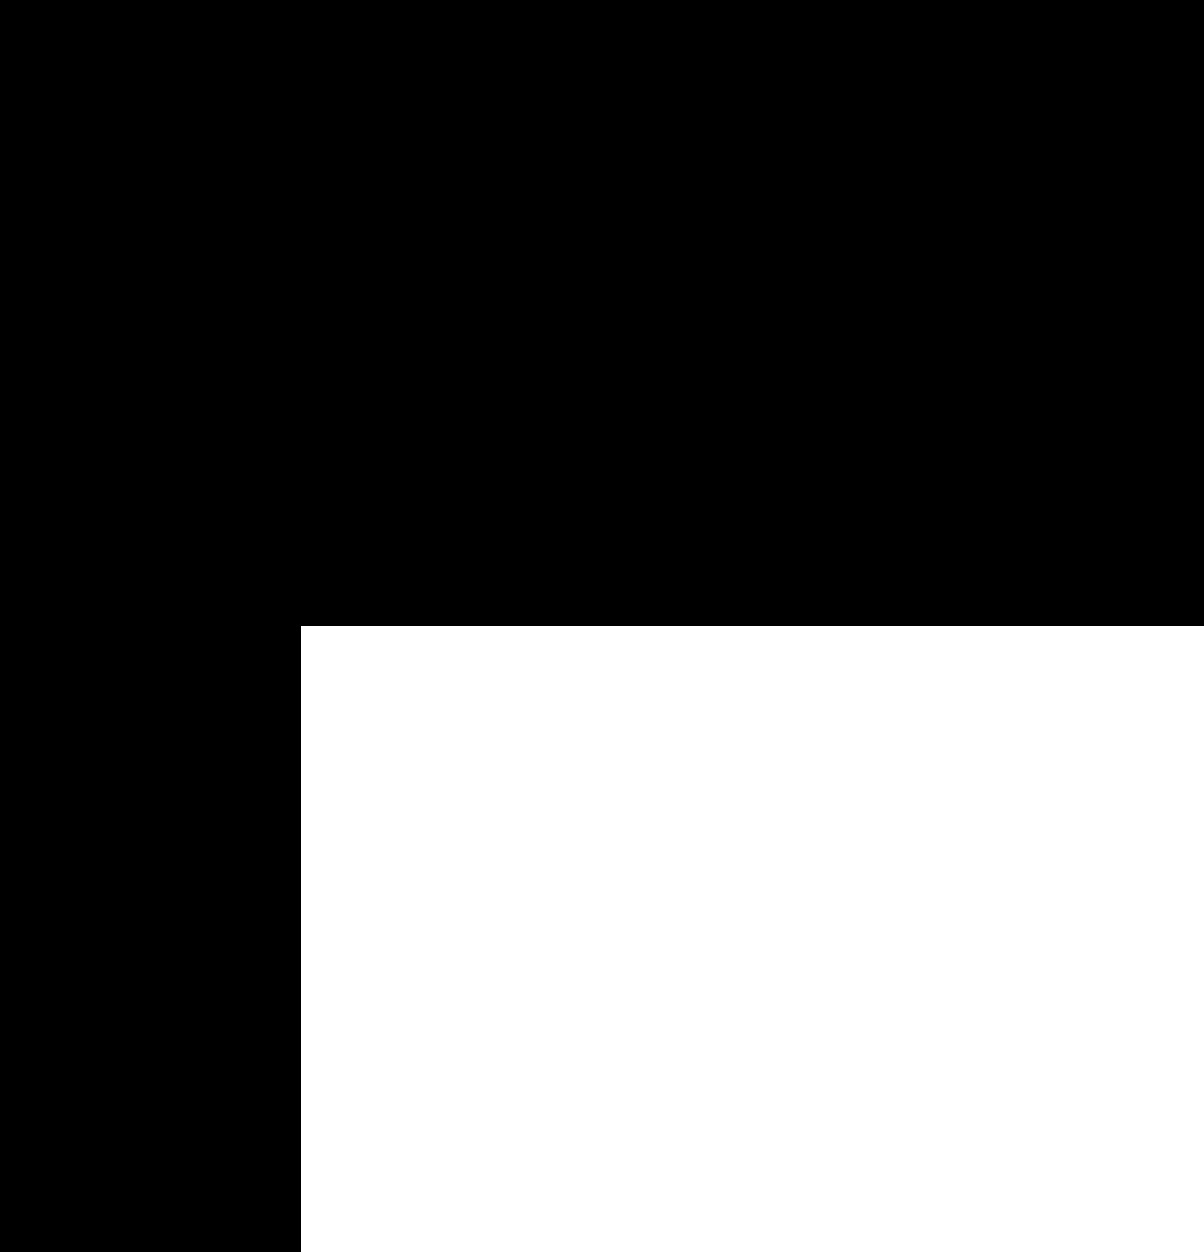
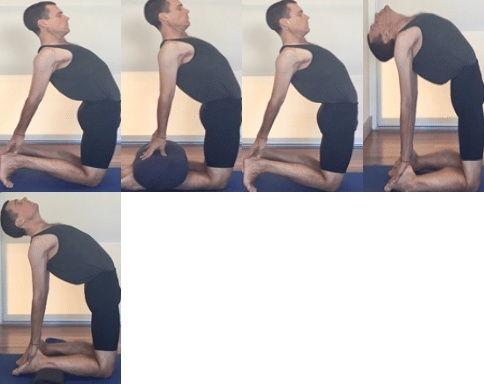
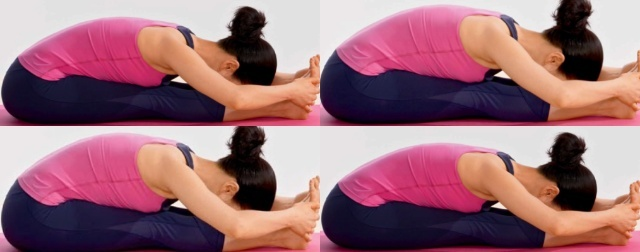
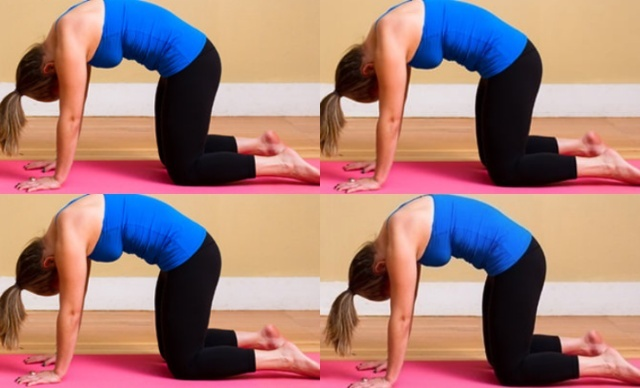
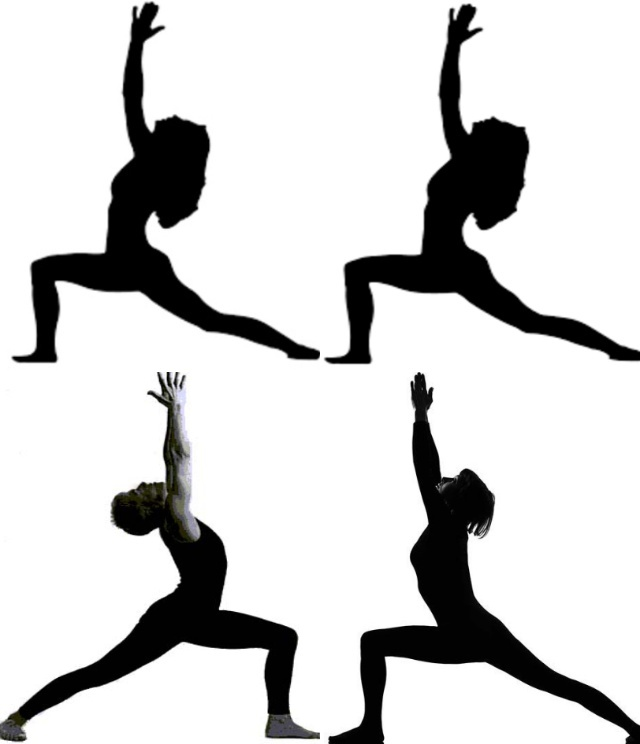
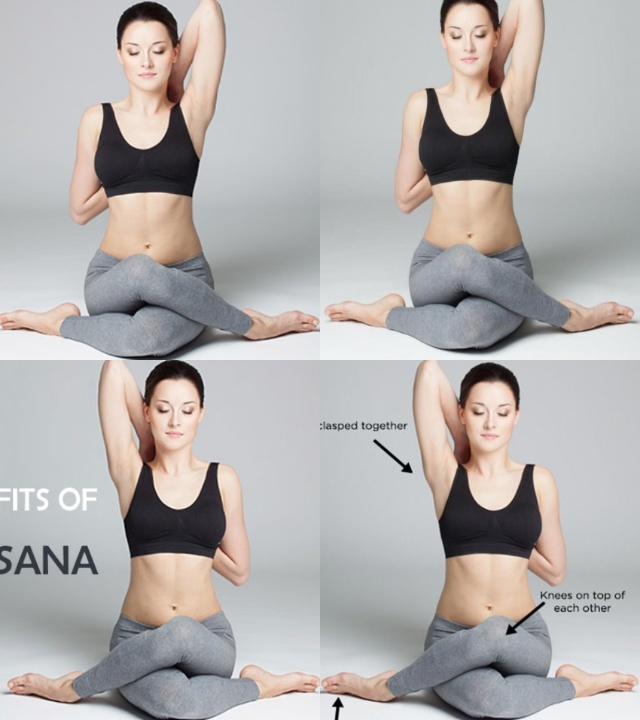

0

In [ ]:
fd.vis.component_gallery(num_images=10)

In [ ]:
clusters_df = get_clusters(connected_components_df)
clusters_df.head() #shows first 5 clusters, we want more



filename  mean_distance  count
component_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
1119          [yoga-pose-image-classification-dataset/dataset/bitilasana/11-0.png, yoga-pose-image-classification-dataset/dataset/bitilasana/41-0.png, yoga-pose-image-classification-dataset/dataset/bitilasana/78-0.png, yoga-pose-image-classification-dataset/dataset/chakravakasana/26-0.png, yoga-pose-image-classification-dataset/dataset/chakravakasana/26-1.png, yoga-pose-image-classification-dataset/dataset/chakravakasana/26-2.png, yoga-pose-image-classification-dataset/dataset/marjaryasana/15-1.png, yoga-pose-image-classification-dataset/dataset/marjaryasana/32-0.png, yoga-pose-image-classification-dataset/dataset/marjaryasana/50-0.png]       0.944274      9
3680                                                                                                                                                                           [yoga-pose-image-classification-dataset/dataset/simhasana/14-0.png, yoga-pose-image-classification-dataset/dataset/simhasana/14-1.png, yoga-pose-image-classification-dataset/dataset/simhasana/25-0.png, yoga-pose-image-classification-dataset/dataset/simhasana/48-0.png, yoga-pose-image-classification-dataset/dataset/simhasana/57-0.png, yoga-pose-image-classification-dataset/dataset/simhasana/57-1.png, yoga-pose-image-classification-dataset/dataset/simhasana/93-0.png]       0.928564      7
1001                                                                                                                                                                                                                          [yoga-pose-image-classification-dataset/dataset/bhujangasana/15-0.png, yoga-pose-image-classification-dataset/dataset/bitilasana/35-0.png, yoga-pose-image-classification-dataset/dataset/bitilasana/84-0.png, yoga-pose-image-classification-dataset/dataset/bitilasana/96-0.png, yoga-pose-image-classification-dataset/dataset/chakravakasana/2-0.png, yoga-pose-image-classification-dataset/dataset/salamba bhujangasana/6-0.png]       0.959195      6
663                                                                                                                                                                                                                                                     [yoga-pose-image-classification-dataset/dataset/astavakrasana/83-1.png, yoga-pose-image-classification-dataset/dataset/astavakrasana/96-1.png, yoga-pose-image-classification-dataset/dataset/eka pada koundinyanasana i/94-1.png, yoga-pose-image-classification-dataset/dataset/eka pada koundinyanasana ii/62-1.png, yoga-pose-image-classification-dataset/dataset/eka pada koundinyanasana ii/84-1.png]       0.994082      5
858                                                                                                                                                              [yoga-pose-image-classification-dataset/dataset/balasana/47. 882af92d43b82dd25d4fdfd5e300d79b-child-yoga-pose-silhouette-by-vexels.png, yoga-pose-image-classification-dataset/dataset/tadasana/32. 300px-tadasana.png, yoga-pose-image-classification-dataset/dataset/tadasana/51. 300px-viparita_namaskar_tadasana.png, yoga-pose-image-classification-dataset/dataset/utkatasana/16. chair-pose-600x450.png, yoga-pose-image-classification-dataset/dataset/utkatasana/35. 200px-utkat

The above shows the component (clusters) with the highest duplicates/near-duplicates.

Now let's keep one image from each cluster and remove the rest:



In [ ]:
# First sample from each cluster that is kept
cluster_images_to_keep = []
list_of_duplicates = []

for cluster_file_list in clusters_df.filename:
    # keep first file, discard rest
    keep = cluster_file_list[0]
    discard = cluster_file_list[1:]

    cluster_images_to_keep.append(keep)
    list_of_duplicates.extend(discard)

print(f"Found {len(set(list_of_duplicates))} highly similar images to discard")

Found 612 highly similar images to discard


In [ ]:
list_of_duplicates

['yoga-pose-image-classification-dataset/dataset/bitilasana/41-0.png',
 'yoga-pose-image-classification-dataset/dataset/bitilasana/78-0.png',
 'yoga-pose-image-classification-dataset/dataset/chakravakasana/26-0.png',
 'yoga-pose-image-classification-dataset/dataset/chakravakasana/26-1.png',
 'yoga-pose-image-classification-dataset/dataset/chakravakasana/26-2.png',
 'yoga-pose-image-classification-dataset/dataset/marjaryasana/15-1.png',
 'yoga-pose-image-classification-dataset/dataset/marjaryasana/32-0.png',
 'yoga-pose-image-classification-dataset/dataset/marjaryasana/50-0.png',
 'yoga-pose-image-classification-dataset/dataset/simhasana/14-1.png',
 'yoga-pose-image-classification-dataset/dataset/simhasana/25-0.png',
 'yoga-pose-image-classification-dataset/dataset/simhasana/48-0.png',
 'yoga-pose-image-classification-dataset/dataset/simhasana/57-0.png',
 'yoga-pose-image-classification-dataset/dataset/simhasana/57-1.png',
 'yoga-pose-image-classification-dataset/dataset/simhasana/93-0.